In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import google.datalab.storage as storage
from PIL import Image
from scipy import misc
import io

In [2]:
def generate_cut(image_matrix):
    x,y = image_matrix.shape[:2]
    x_start = random.randint(0, int(x/2))
    y_start = random.randint(0, int(y/2))
    x_end = limit(x_start + int(x/2) + random.randint(0, int(x/16)), x)
    y_end = limit(y_start + int(y/2) + random.randint(0, int(y/16)), y)
    image_cut = image_matrix[x_start:x_end, y_start:y_end]
    return image_cut
  
def limit(a, b):
  if a < b:
      return a
  else: return b

def prepare_image(test_sample):
  test_stream = io.BytesIO(test_sample)
  my_test_image = Image.open(test_stream)
  test_image_matrix = np.asarray(my_test_image)
  test_input_image = misc.imresize(generate_cut(test_image_matrix), (40, 60)).astype("float32")
  normalized_test_image = test_input_image.ravel()/255
  test_input = np.atleast_2d(normalized_test_image)
  return test_input


In [3]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('convolutional_network.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))

graph = tf.get_default_graph() 
x = graph.get_tensor_by_name("input:0")
y = graph.get_tensor_by_name("output:0")

ERROR:tensorflow:Couldn't match files for checkpoint ./convolutional_network
INFO:tensorflow:Restoring parameters from None


SystemError: <built-in function TF_Run> returned a result with an error set

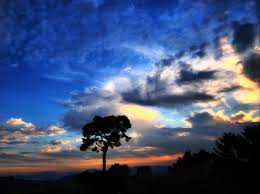

In [4]:
sample_bucket = storage.Bucket("copyright")
test_data = [_object for _object in sample_bucket.objects()
             if "train" not in _object.key and ".jpg" in _object.key and "test" not in _object.key]

test_sample = test_data[8].download()
test_stream = io.BytesIO(test_sample)
my_test_image = Image.open(test_stream)
my_test_image

In [5]:
for i in range(len(test_data)):
  my_test_sample = test_data[i].download()
  test_input = prepare_image(my_test_sample)

  get_output = tf.argmax(y,1) 
  print(sess.run(get_output, feed_dict={x: test_input}))
  #print(sess1.run(y, feed_dict={x: X_test, y_actual: Y_test}))

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[45]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[81]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
